In [16]:
import pickle

directory = './boc/formatted/'

import glob

#dictionary where key is the dataset name, and the scores and features for that dataset are the values
results = {}

for filename in glob.glob(directory + '*_CV_results.pkl'):
    filehandle = open(filename)
    
    (scores, features) = pickle.load(filehandle)
    
    filehandle.close()
    
    results[filename[16:25]] = (scores, features)

    print filename

./boc/formatted/502741583_CV_results.pkl
./boc/formatted/510698988_CV_results.pkl
./boc/formatted/503772253_CV_results.pkl
./boc/formatted/511976329_CV_results.pkl
./boc/formatted/501567237_CV_results.pkl
./boc/formatted/505687912_CV_results.pkl
./boc/formatted/509630631_CV_results.pkl
./boc/formatted/501559087_CV_results.pkl
./boc/formatted/509959266_CV_results.pkl
./boc/formatted/508378520_CV_results.pkl
./boc/formatted/500964514_CV_results.pkl
./boc/formatted/503820068_CV_results.pkl
./boc/formatted/512149367_CV_results.pkl
./boc/formatted/510166410_CV_results.pkl
./boc/formatted/511458874_CV_results.pkl
./boc/formatted/501889084_CV_results.pkl
./boc/formatted/501800164_CV_results.pkl
./boc/formatted/505801925_CV_results.pkl
./boc/formatted/509841198_CV_results.pkl
./boc/formatted/512124564_CV_results.pkl
./boc/formatted/506539927_CV_results.pkl
./boc/formatted/506520703_CV_results.pkl
./boc/formatted/501498760_CV_results.pkl
./boc/formatted/496908818_CV_results.pkl
./boc/formatted/

In [15]:
filename[16:25]

'501929146'

In [29]:
import numpy as np

#first let's just make some aggregate statistics

non_linearity = ['exp', 'sigmoid', 'relu']
noise_model = ['exponential', 'gaussian']

best_noise_model = []
best_non_linearity = []

likelihood_exponential = []
likelihood_gaussian = []

for key in results.keys():
    
    scores, _ = results[key]
    
    n_cells, n_nl, n_nm = scores.shape
    
    for i in range(n_cells):
        idx = np.argmin(scores[i])
        
        nl_ind, nm_ind = np.unravel_index(idx, (n_nl, n_nm))
        
        if scores[i, nl_ind, nm_ind] != np.nan:
            best_noise_model.append(nm_ind)
            best_non_linearity.append(nl_ind)


            if nl_ind == 0:
                likelihood_exponential.append(scores[i, nl_ind, nm_ind])

            if nl_ind == 1:
                likelihood_gaussian.append(scores[i, nl_ind, nm_ind])

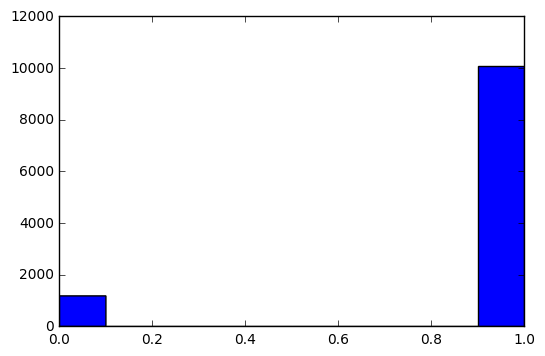

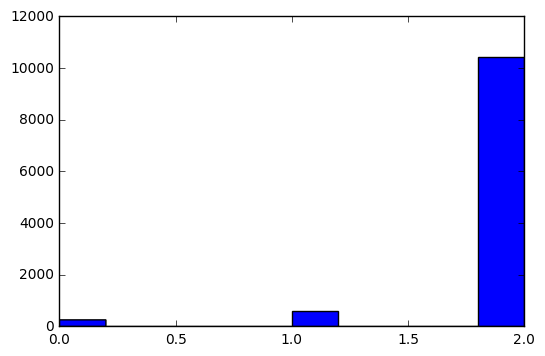

In [30]:

import matplotlib.pyplot as plt



best_noise_model = np.array(best_noise_model)
best_non_linearity = np.array(best_non_linearity)

plt.hist(best_noise_model)
plt.show()
plt.hist(best_non_linearity)
plt.show()

In [31]:
print sum(best_non_linearity == 0), sum(best_non_linearity == 1), sum(best_non_linearity == 2)

255 595 10425


In [32]:
for j, nm in enumerate(noise_model):
    for k, nl in enumerate(non_linearity):
        print nm, nl

exponential exp
exponential sigmoid
exponential relu
gaussian exp
gaussian sigmoid
gaussian relu


254 595


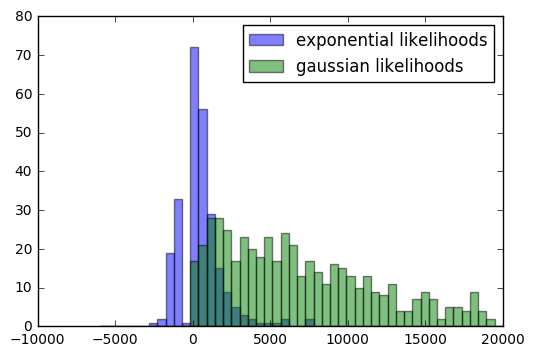

In [96]:

le = -np.array(likelihood_exponential)
le = le[~np.isnan(le)]
lg = -np.array(likelihood_gaussian)
lg = lg[~np.isnan(lg)]

print len(le), len(lg)

bins = np.linspace(-6000, 20000, 50)

plt.hist(le, bins = bins, alpha = .5, label = "exponential likelihoods")
plt.hist(lg, bins = bins, alpha = .5, label = "gaussian likelihoods")
plt.legend()
plt.show()

In [34]:
from glm_utils import *

In [89]:
#let's iterate through keys, get the data, check R^2
import allensdk.brain_observatory.stimulus_info as stim_info
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
from sklearn.linear_model import LinearRegression

nl_dic = {0:np.exp, 1:sigmoid, 2:relu }
corrs = []
likelihood = []

for key in results.keys()[0:10]:
    
    boc = BrainObservatoryCache(manifest_file='boc/manifest.json') 
    data_set = boc.get_ophys_experiment_data(int(key))
    dff_traces, images, stim_table = get_data(data_set, stim_info.NATURAL_SCENES)
    
    images = pca_features(images)
    
    #and a list for the stimulus
    data = []
    stim_array = []

    #average each trace over the presentation of each stimulus
    for index, row in stim_table.iterrows():
        stim_array.append(images[row.frame])
        data.append(np.mean(dff_traces[:, row['start']:row['end'] ], axis = 1) )

    stim_array = np.array(stim_array)
    #stim_array = stim_array[:, 0:10]

    data = np.array(data)
    
    scores, features = results[key]
    
    n_cells, n_nl, n_nm = scores.shape
    
    for i in range(n_cells):
        idx = np.argmin(scores[i])
        
        nl_ind, nm_ind = np.unravel_index(idx, (n_nl, n_nm))
        
        if scores[i, nl_ind, nm_ind] != np.nan:
            
            w = features[i, nl_ind, nm_ind, 0:-2]
            o = features[i, nl_ind, nm_ind, -2]
            s = features[i, nl_ind, nm_ind, -1]
            
            
            print o, s
            
            con = cond_int(nl_dic[nl_ind], w, stim_array, s, o)
            
            corr = np.corrcoef(con, data[:, i])
            
            corrs.append(corr[1, 1])
            likelihood.append(scores[i, nl_ind, nm_ind])
    

0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0


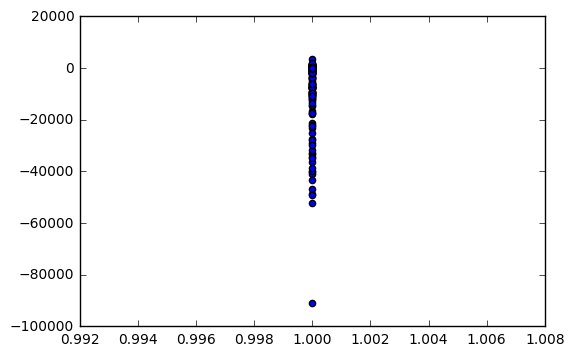

In [97]:
%matplotlib inline

plt.scatter(corrs, likelihood)